## StackOverflow Survey 2020

### Note - link to blog post
The link to the blog post can be found under "Links" in `README.md`. If in any case that does not work. Please find it [here](https://medium.com/@xi_xiaodong/a-simple-look-into-stack-overflow-2020-survey-results-4e2670042989).

My Questions:
1. Relationship between age and number of languages worked with?
2. Proportion of visit and participate, and the relationship to JobSatisfaction
3. People's option when stuck on problem? Any insights that we get from the survey results on the optimal problem-solving approach?

Business understanding
---

Stack Overflow is an online platform designed for idea exchange and sharing of problem solving issues and experiences. The Stack Overflow annual survey contains the data describing the user behaviour and experience. With certain data manipulation techniques, one can gain vast amount of insights from the survey results.

Data understanding
---

The data is collected in 2020 and would mainly contain user responses summarising their experience from 2019 to 2020. However, there are certain fields with unexpected survey inputs, which can be the result of typo, mis-entered user value, and missing data. There might be several reasons for missing data, but we need to investigate.

Prepare data
---

We need to first visualise data and drop any columns / rows if necessary, so as to minimise the impact from missing data on data modelling.

The data preparation can be carried out for the whole dataset. However, this might be tedious and I might be spending too much time on fields that I do not need to answer the 3 questions in my mind. Therefore, I will only prepare the data for modelling for each of the questions, so that I am efficient.

Missing values
---

Missing values are handled when it affects the modelling. However, they are treated with care, because in some cases, a "nan" value might suggest that the field is zero, which is helpful and we can add value by considering this in modelling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
df = pd.read_csv('developer_survey_2020/survey_results_public.csv', delimiter=',')

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


---
Question 1
---

In [41]:
np.sum(df[['Age']] > 100)

Age    1
dtype: int64

In [43]:
df[['LanguageWorkedWith']].dtypes

LanguageWorkedWith    object
dtype: object

In [7]:
# Change the object to string
df['LanguageWorkedWith'] = df['LanguageWorkedWith'].astype('str') 

In [8]:
df[['LanguageWorkedWith']]

,LanguageWorkedWith
0,C#;HTML/CSS;JavaScript
1,JavaScript;Swift
2,Objective-C;Python;Swift
3,nan
4,HTML/CSS;Ruby;SQL
...,...
64456,nan
64457,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458,nan
64459,HTML/CSS


### Analysis - and missing value consideration
We can see that some people entered many languages and some entries appear as "nan". This might not be because the entry is missing. This actually reflects the fact that some users of Stack Overflow do not have any experience with any language. This is very plausible, since for some of the fresher users, this might be a time for them to start learning their first computing language. Therefore, we should count the "nan" as "having worked with zero laguange in the past". For the rest of the entries, we can simply count the number of semi-colons and add one to the count, in order to get the total number of languages specified.

In [9]:
def countLang(x):
    '''
    Count the number of languages separated by ";"
    Input:
        dataframe
    Returns:
        Count of items in the cell
    '''
    if x == 'nan':
        return 0
    else:
        return x.count(';') + 1

In [10]:
df['NumLang'] = df.apply(lambda x: countLang(x['LanguageWorkedWith']), axis=1)

In [11]:
df[['NumLang']]

,NumLang
0,3
1,2
2,3
3,0
4,3
...,...
64456,0
64457,25
64458,0
64459,1


### Analysis
We see that the numbers are nicely calculated. Let's now put the numbers into a bar graph so as to see the distribution of our population over the number of languages.

(array([34386., 26691.,  3123.,   185.,    76.]),
 array([ 0.,  5., 10., 15., 20., 25.]),
 <a list of 5 Patch objects>)

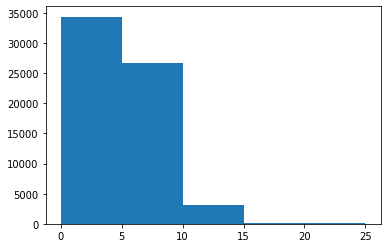

In [17]:
plt.hist(df['NumLang'],bins=5)

### Analysis
The bar graph shows us that the majority of people have worked with fewer than 10 languages. Some of them have 10 to 15. Also, it seems that there are a few counts in the 15-20 and 20-25 region, but we are not sure. Let's check if that is really the case.

In [12]:
df[['NumLang']].describe()

,NumLang
count,64461.00000
mean,4.46788
std,2.97310
min,0.00000
25%,2.00000
50%,4.00000
75%,6.00000
max,25.00000


### Analysis
Indeed! The max value is 25, showing that there are people who have worked with a lot of languages. Let's assume that this is true without further knowledge about the people, and carry on with analysis.

In [14]:
np.sum(df['Age'].isnull())/df.shape[0]

0.2949845643102031

### Analysis - missing value treatment
We see that many entries are missing under "Age". This might be because that some people are mroe sensitive and are unwilling to disclose their age. Let's remove those becasue they are not helpful for my analysis.

In [15]:
df1 = df.dropna(subset=['Age'])

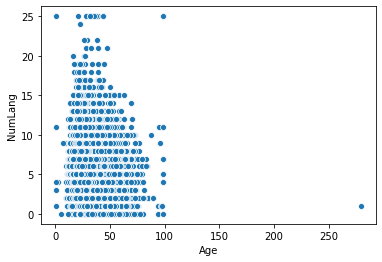

In [18]:
sns.scatterplot(df1['Age'], df1['NumLang']);

In [17]:
df1['Age'].max()

279.0

Wow! There is one person with age 279! This cannot be true. While this might be a typo of mistyping 27.9 as 279, we cannot confirm this, so let's remove this entry.

In [32]:
df1.drop(df1[df1.Age > 150].index, inplace=True)

This does not give us much insight because age groups are not evenly distributed in our population. Let's discover more using some profiling technique.

In [36]:
df1.drop(df1[df1.Age < 10].index, inplace=True)

We can create bins to get an idea of the number of languages that people from each age group have learnt. Let's put them in 5 year age groups.

In [52]:
df1[['Age', 'NumLang']].groupby(pd.cut(df1['Age'], np.arange(10, 100, 5))).mean().index.to_list()

[Interval(10, 15, closed='right'),
 Interval(15, 20, closed='right'),
 Interval(20, 25, closed='right'),
 Interval(25, 30, closed='right'),
 Interval(30, 35, closed='right'),
 Interval(35, 40, closed='right'),
 Interval(40, 45, closed='right'),
 Interval(45, 50, closed='right'),
 Interval(50, 55, closed='right'),
 Interval(55, 60, closed='right'),
 Interval(60, 65, closed='right'),
 Interval(65, 70, closed='right'),
 Interval(70, 75, closed='right'),
 Interval(75, 80, closed='right'),
 Interval(80, 85, closed='right'),
 Interval(85, 90, closed='right'),
 Interval(90, 95, closed='right')]

In [60]:
my_ind = []
for j in range(10,95,5):
    my_ind.append('{} to {}'.format(j,j+5))

['10 to 15',
 '15 to 20',
 '20 to 25',
 '25 to 30',
 '30 to 35',
 '35 to 40',
 '40 to 45',
 '45 to 50',
 '50 to 55',
 '55 to 60',
 '60 to 65',
 '65 to 70',
 '70 to 75',
 '75 to 80',
 '80 to 85',
 '85 to 90',
 '90 to 95']

In [56]:
summary_df = df1[['Age', 'NumLang']].groupby(pd.cut(df1['Age'], np.arange(10, 100, 5))).mean()

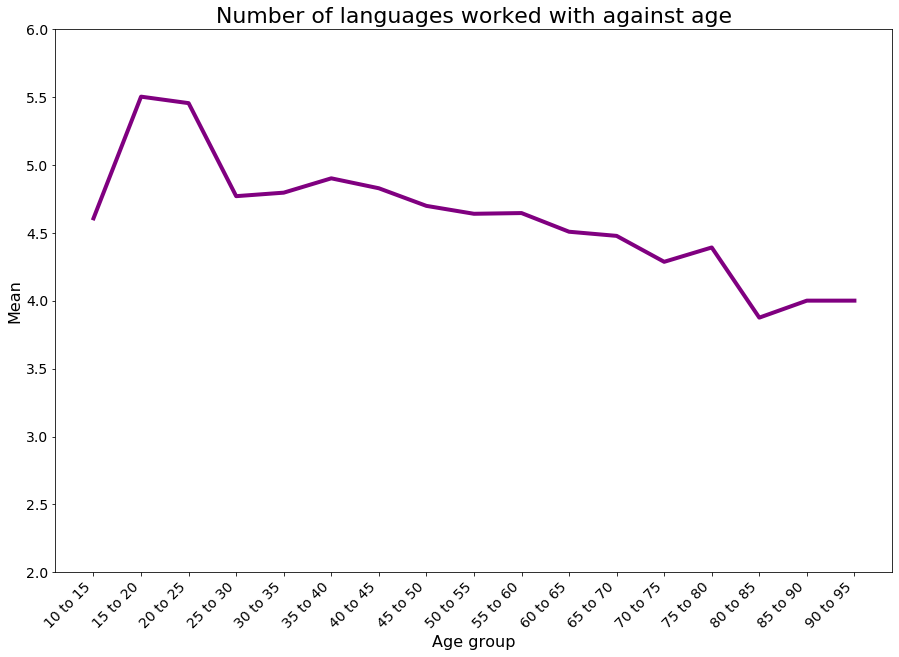

In [93]:
plt.figure(figsize=(15,10))
plt.plot(my_ind, summary_df['NumLang'], color='purple', linewidth=4)
plt.xlabel('Age group', fontsize=16)
plt.ylabel('Mean', fontsize=16)
plt.xticks(rotation=45, fontsize=14, ha='right')
plt.yticks(fontsize=14)
plt.ylim(2,6)
plt.title('Number of languages worked with against age', fontsize=22)
plt.show()

### Analysis
We see that the number of language learned does not increase with age. Young people might be able to learn more languages in a shorter time!

---
## Question 2
Proportion of visit and participate, and the relationship to JobSatisfaction

---

In [83]:
df['SOVisitFreq'].isna().sum()

7491

In [84]:
df['SOPartFreq'].isna().sum()

17669

In [87]:
df2 = df.dropna(subset=['SOVisitFreq', 'SOPartFreq'], how='any')

In [88]:
set(df2['SOPartFreq'])

{'A few times per month or weekly',
 'A few times per week',
 'Daily or almost daily',
 'I have never participated in Q&A on Stack Overflow',
 'Less than once per month or monthly',
 'Multiple times per day'}

In [89]:
set(df2['SOVisitFreq'])

{'A few times per month or weekly',
 'A few times per week',
 'Daily or almost daily',
 'Less than once per month or monthly',
 'Multiple times per day'}

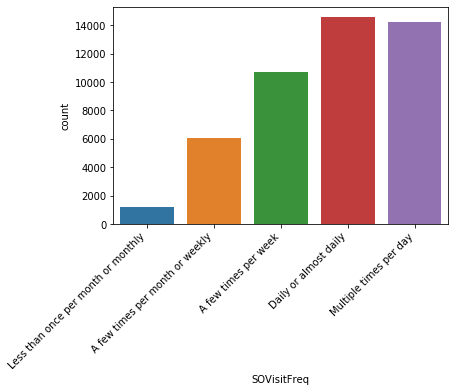

In [98]:
ordered = ['Less than once per month or monthly',
           'A few times per month or weekly', 
           'A few times per week',
           'Daily or almost daily',
           'Multiple times per day']
sns.countplot(df2['SOVisitFreq'],order=ordered)
plt.xticks(rotation=45, ha='right')
plt.show()

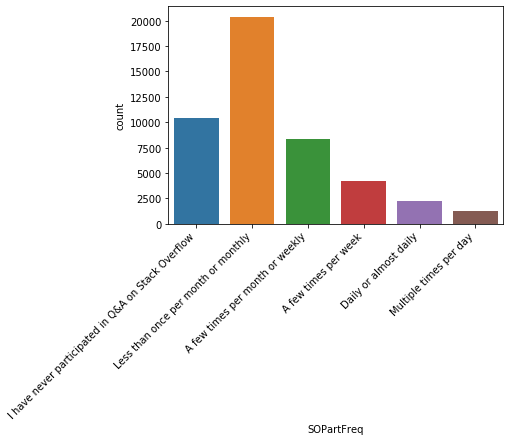

In [95]:
ordered = ['I have never participated in Q&A on Stack Overflow',
           'Less than once per month or monthly',
           'A few times per month or weekly', 
           'A few times per week',
           'Daily or almost daily',
           'Multiple times per day']
sns.countplot(df2['SOPartFreq'], order=ordered)
plt.xticks(rotation=45, ha='right')
plt.show()

### Analysis
These seem to be helpful charts. However, we are unable to associate one to the other, because we have not tracked people's responses to the survey from the "visit" field to the "participation" field. There might be some people who visit daily but never participate, etc. With a stacked bar chart we might gain more insights!

In [ ]:
df_part_visit = df2.groupby(['SOPartFreq', 'SOVisitFreq']).size().reset_index().pivot(columns='SOPartFreq', index='SOVisitFreq', values=0).loc[ordered]

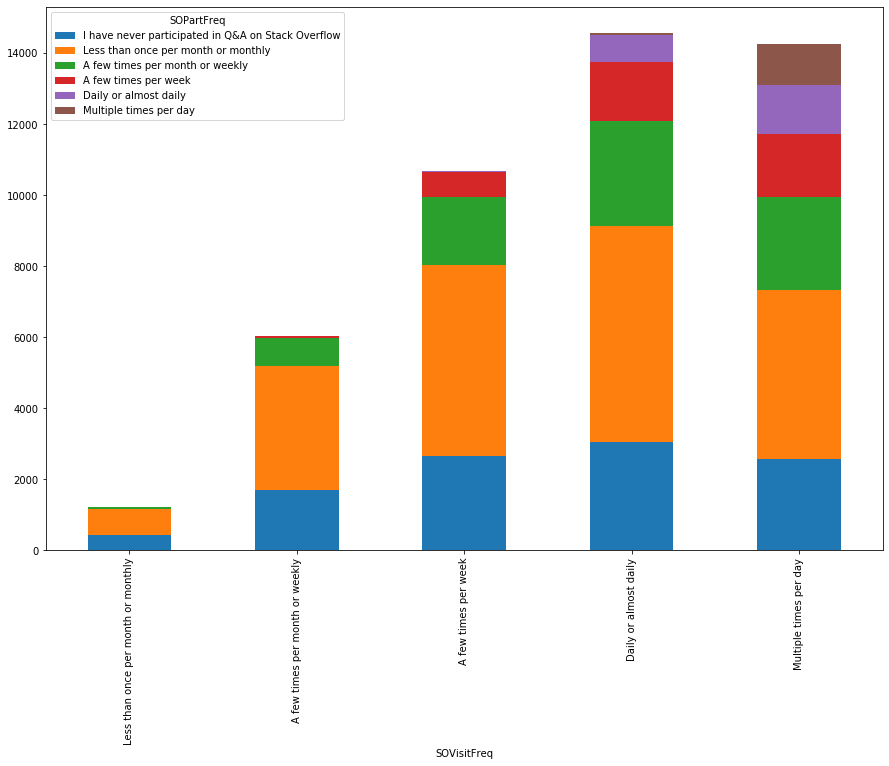

In [112]:
df_part_visit.plot(kind='bar', stacked=True, figsize=(15,10))
plt.show()

In [109]:
df_part_visit

SOPartFreq,A few times per month or weekly,A few times per week,Daily or almost daily,I have never participated in Q&A on Stack Overflow,Less than once per month or monthly,Multiple times per day
SOVisitFreq,,,,,,
Less than once per month or monthly,39.0,10.0,1.0,423.0,746.0,NaN
A few times per month or weekly,803.0,42.0,11.0,1708.0,3474.0,3.0
A few times per week,1905.0,702.0,35.0,2651.0,5378.0,10.0
Daily or almost daily,2957.0,1669.0,763.0,3057.0,6063.0,65.0
Multiple times per day,2611.0,1767.0,1388.0,2574.0,4754.0,1145.0


In [111]:
ordered = ['I have never participated in Q&A on Stack Overflow',
           'Less than once per month or monthly',
           'A few times per month or weekly', 
           'A few times per week',
           'Daily or almost daily',
           'Multiple times per day']
df_part_visit = df_part_visit.reindex(columns=ordered)

### Analysis
We can see that with more visits, people generally participate more in the discussions!

---
## Question 3
People's option when stuck on problem? Any insights that we get from the survey results on the optimal problem-solving approach?

---

First, let's see what the options are for this question of "what do you do when stuck on a problem".

In [114]:
set(df['NEWStuck'])

{'Call a coworker or friend',
 'Call a coworker or friend;Do other work and come back later',
 'Call a coworker or friend;Do other work and come back later;Visit another developer community (please name):',
 'Call a coworker or friend;Go for a walk or other physical activity',
 'Call a coworker or friend;Go for a walk or other physical activity;Do other work and come back later',
 'Call a coworker or friend;Go for a walk or other physical activity;Do other work and come back later;Visit another developer community (please name):',
 'Call a coworker or friend;Go for a walk or other physical activity;Panic',
 'Call a coworker or friend;Go for a walk or other physical activity;Panic;Do other work and come back later',
 'Call a coworker or friend;Go for a walk or other physical activity;Panic;Do other work and come back later;Visit another developer community (please name):',
 'Call a coworker or friend;Go for a walk or other physical activity;Panic;Watch help / tutorial videos',
 'Call a 

We can put the options into a list, and work from there by creating a dummy variable.

In [3]:
possible_vals = ['Call a coworker or friend', 
                 'Do other work and come back later', 
                 'Visit another developer community (please name):', 
                 'Go for a walk or other physical activity', 
                 'Panic',
                 'Watch help / tutorial videos', 
                 'Visit Stack Overflow', 
                 'Meditate', 
                 'Play games']

df_dummy = df['NEWStuck'].str.get_dummies(sep=';')

Now we can plot a pie chart!

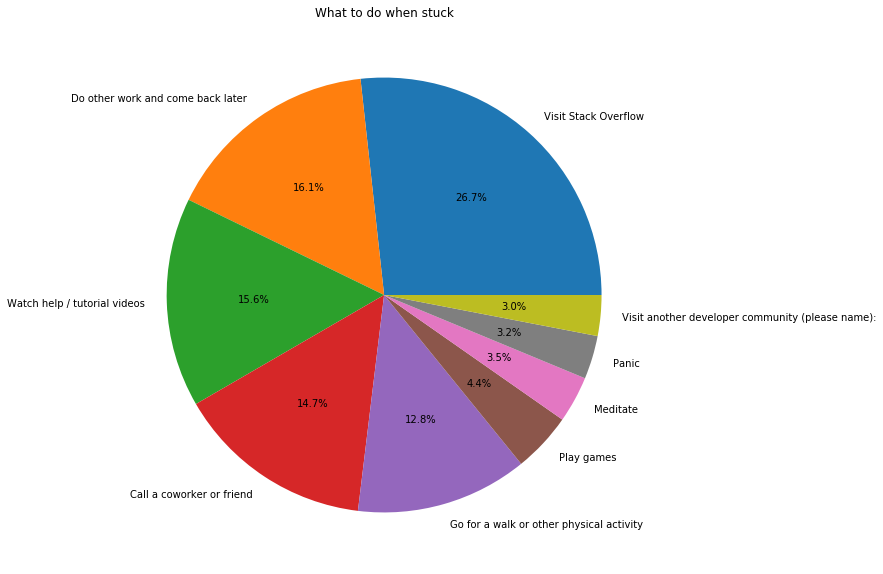

In [4]:
df_dummy.sum().sort_values(ascending=False).plot(kind='pie', 
                                                 figsize=(15,10), 
                                                 title='What to do when stuck',
                                                 autopct='%1.1f%%')
plt.ylabel('')
plt.show()

### Analysis
We can see from the chart that many people actually go on and do other things when stuck on a problem. And it is unsurprising that "visit Stack Overflow is the most popular choice, since the survey was conducted among people who are likely to be regular users of the platform!